<a href="https://colab.research.google.com/github/KoMurase/network/blob/master/%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E5%AF%86%E5%BA%A6%E3%81%A8%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E4%BF%82%E6%95%B0_%E3%82%B3%E3%83%9F%E3%83%A5%E3%83%8B%E3%83%86%E3%82%A3%E3%81%AE%E6%8A%BD%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>ネットワークの密度とクラスタ係数</h1>

In [0]:
import matplotlib.pyplot as plt 
import networkx as nx 

In [0]:
def draw_m(G, pos):
  nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
  labels = nx.draw_networkx_labels(G, pos)
  edges = nx.draw_networkx_edges(G, pos)
  plt.title(['density: {:.5}'.format(nx.density(G)), 'clustering coefficient: {:.5}'.format(nx.average_clustering(G))])
  plt.axis('off')
  plt.show()

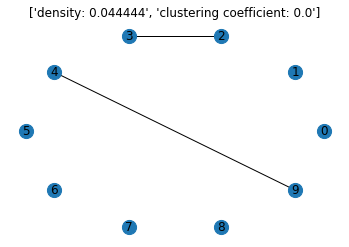

In [27]:
rnd = nx.gnp_random_graph(10, 0.1)
pos = nx.circular_layout(rnd)
draw_m(rnd, pos)

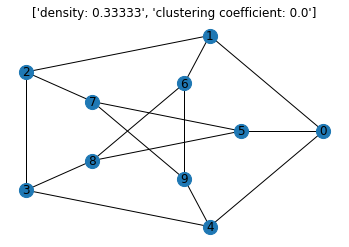

In [28]:
petersen = nx.petersen_graph()
pos = nx.shell_layout(petersen, nlist=[range(5,10), range(5)])
draw_m(petersen, pos)

<h1>コミニュティの抽出</h1>

In [33]:
from google.colab import files 
from networkx.algorithms import community 
import pandas as pd 

uploaded = files.upload() 


Saving lesmis.gml to lesmis (1).gml


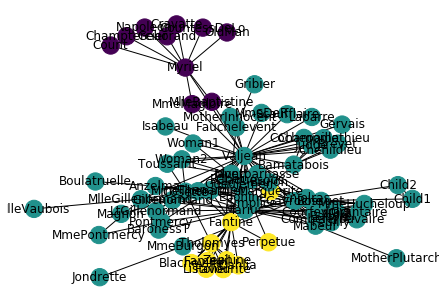

In [34]:
for fn in uploaded.keys():
  G = nx.readwrite.gml.read_gml(fn)

carac = pd.DataFrame({'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

communities_generator = community.centrality.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

for m in range(len(next_level_communities)):
  for n in next_level_communities[m]:
    carac.loc[carac.ID ==n, 'myvalue'] = m
nx.draw_spring(G, node_color = carac['myvalue'], node_size=300,with_labels=True)

#savefn = fn.split('.')[0]+ '.png'
#plt.savefig(savefn)
#files.download(savefn)

<h2>結果の保存もできる</h2>

In [0]:
def create_fig(uploaded):

  for fn in uploaded.keys():
    G = nx.readwrite.gml.read_gml(fn)

  carac = pd.DataFrame({'ID':G.nodes(), 'myvalue':[0]*len(G.nodes()) })

  communities_generator = community.centrality.girvan_newman(G)
  top_level_communities = next(communities_generator)
  next_level_communities = next(communities_generator)

  for m in range(len(next_level_communities)):
    for n in next_level_communities[m]:
      carac.loc[carac.ID ==n, 'myvalue'] = m
  nx.draw_spring(G, node_color = carac['myvalue'], node_size=300,with_labels=True)

In [45]:
uploaded_ = files.upload() 

Saving adjnoun.gml to adjnoun.gml


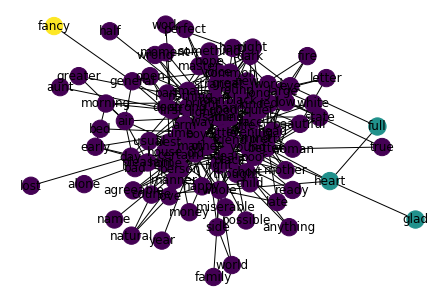

In [46]:
create_fig(uploaded_)

In [0]:
中学生の友人関係:中心となっている頂点や孤立している頂点、密に結合しているグループの数や大きさなど

大都市の鉄道網:ネットワークの連結性(頂点間を結ぶパスが存在するかどうか), 頂点間のパスの長さなど

動物の食物連鎖:ネットワークの階層性、どの動物が絶滅して、繁殖しているか　どの動物に影響を与えるかなどの依存関係